## Subject Number and Name: 94691 Deep Learning - Autumn 2019
### Assessment Number                    : 1
### Due Date                                        : April 22, 2019
### Student Number                            : 10885123


# Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image # To grab the images and extract useful information

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

np.random.seed(42) # Set random seed

# Data

In [2]:
# Notes: Added train_selected directory in my working directory.
#        Extracted all files from train_selected.zip
# Set the dataset directory
dataset_dir = os.getcwd() + "/train_selected"

# Get the data labels
labels_file = dataset_dir + "/train_selected.csv"
data_labels = pd.read_csv(labels_file)

data_labels.shape
# dataset_dir


(4870, 2)

In [3]:
# Get X files
file_list = [dataset_dir + "/" + str(x) + ".png" for x in list(data_labels["id"])]
# file_list

In [4]:
# Get the labels
# finds column label with value = 'automobile' and assigns value 1 if true or 0 if false
data_labels["class"] = np.where(data_labels['label']=='automobile', 1, 0) 
# counts the number of unique values, sum of 1s and 0s
data_labels["class"].value_counts()
# data_labels


0    4370
1     500
Name: class, dtype: int64

In [5]:
## TO DO ##

# Create a function that will standardise the dataset
# Replace False

def standarise_data(dataset):
    # to standardise pixel data divide by 255
    new_dataset = dataset/255.
     
    return new_dataset


In [6]:
def load_data():
    global X_train, X_test, y_train, y_test, X, y

    # loads the image files into an array, considers the number of pixels and colors.
    X = np.array([np.array(Image.open(fname)) for fname in file_list])
    
    # loads the class into an array
    y = np.array(data_labels["class"])
    
    # sets the split of training ang testing datasets, random_state ensure that every run will provide the same results
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # y_train.shape[0] gets the number of rows
    y_train = y_train.reshape(1, y_train.shape[0])
    y_test = y_test.reshape(1, y_test.shape[0])
    
    # Reshape the training and test examples 
    X_train_f = X_train.reshape(X_train.shape[0], -1).T
    X_test_f = X_test.reshape(X_test.shape[0], -1).T
    
       
    # Standardize data to have feature values between 0 and 1.
    X_train = standarise_data(X_train_f)
    X_test = standarise_data(X_test_f)
    
    X_train = np.squeeze(X_train)
    X_test = np.squeeze(X_test)
    
    print ("Flatten X_train: " + str(X_train.shape))
    print ("Flatten X_test: " + str(X_test.shape))
    
    print ("y_train: " + str(y_train.shape))
    print ("y_test: " + str(y_test.shape))
    
    # print ("Flatten X_train_f: " + str(X_train_f.shape))
    # print ("Flatten X_test_f: " + str(X_test_f.shape))
    
       
    return


In [7]:
load_data()

Flatten X_train: (3072L, 3409L)
Flatten X_test: (3072L, 1461L)
y_train: (1L, 3409L)
y_test: (1L, 1461L)


# Quick 'normal' ml

You will find the following resources useful:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
X_train_clf = X_train.T
X_test_clf = X_test.T

y_train_clf = y_train.T.ravel()
y_test_clf = y_test.T.ravel()

print(X_train_clf.shape, X_test_clf.shape, y_train_clf.shape, y_test_clf.shape)

((3409L, 3072L), (1461L, 3072L), (3409L,), (1461L,))


In [9]:
from sklearn.linear_model import LogisticRegressionCV 
import datetime

C_list = np.linspace(0.001, 0.5, 20)
log_reg = LogisticRegressionCV(
    Cs=C_list, cv=10, penalty='l2', scoring='roc_auc', solver='liblinear', tol =1e-4, max_iter=1000, 
    class_weight='balanced', n_jobs=7, verbose=2, refit=True, multi_class='ovr', random_state=42
)

#Fit to our model
start = datetime.datetime.now()
log_reg.fit(X_train_clf, y_train_clf)
end = datetime.datetime.now()
print("Total time taken: {}".format(end - start))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   3 out of  10 | elapsed:  7.4min remaining: 17.2min
[Parallel(n_jobs=7)]: Done  10 out of  10 | elapsed: 11.2min finished


[LibLinear]Total time taken: 0:11:15.212000


In [10]:
#Predict the class
y_test_clf = pd.DataFrame(y_test_clf, columns=["actual"])
y_test_clf["predictions_lr"] = log_reg.predict(X_test_clf)

In [11]:
# Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(y_test_clf.actual, y_test_clf.predictions_lr))

# Get classification report
print(classification_report(y_test_clf.actual, y_test_clf.predictions_lr))

# Get ROC-AUC
print("ROC-AUC Score \n", roc_auc_score(y_test_clf.actual, y_test_clf.predictions_lr))

# Get accuracy
print("Accuracy Score \n", accuracy_score(y_test_clf.actual, y_test_clf.predictions_lr))

('Confustion Matrix \n', array([[1154,  143],
       [  53,  111]], dtype=int64))
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1297
           1       0.44      0.68      0.53       164

   micro avg       0.87      0.87      0.87      1461
   macro avg       0.70      0.78      0.73      1461
weighted avg       0.90      0.87      0.88      1461

('ROC-AUC Score \n', 0.7832874174925251)
('Accuracy Score \n', 0.865845311430527)


In [12]:
# A tree based example

from sklearn.ensemble import RandomForestClassifier
import datetime

#Create the model object
rf_class = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', 
    max_depth=15, min_samples_split=3, bootstrap=True, oob_score=True, 
    n_jobs=7, random_state=42, verbose=1, class_weight='balanced' 
)

#Fit to our model
start = datetime.datetime.now()
rf_class.fit(X_train_clf, y_train_clf)
end = datetime.datetime.now()
print("Total time taken: {}".format(end - start))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.8s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    9.4s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:   21.2s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   37.7s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:   47.8s finished


Total time taken: 0:01:03.178000


In [13]:
#Predict the class
y_test_clf["predictions_rf"] = rf_class.predict(X_test_clf)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [14]:
# Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(y_test_clf.actual, y_test_clf.predictions_rf))

# Get classification report
print(classification_report(y_test_clf.actual, y_test_clf.predictions_rf))

# Get ROC-AUC
print("ROC-AUC Score \n", roc_auc_score(y_test_clf.actual, y_test_clf.predictions_rf))

# Get accuracy
print("Accuracy Score \n", accuracy_score(y_test_clf.actual, y_test_clf.predictions_rf))

('Confustion Matrix \n', array([[1297,    0],
       [ 151,   13]], dtype=int64))
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1297
           1       1.00      0.08      0.15       164

   micro avg       0.90      0.90      0.90      1461
   macro avg       0.95      0.54      0.55      1461
weighted avg       0.91      0.90      0.86      1461

('ROC-AUC Score \n', 0.5396341463414634)
('Accuracy Score \n', 0.8966461327857632)


# Initialise

Notes:
The model will have the following layers
     - 1 input layer (will be the number of rows of input (i.e. number of training/test records)
     - 3 hidden layers (hidden layer sizes 10,25,10)
     - Relu activation function for all layers except the last layer
     - last layer will be a sigmoid function

In [15]:
## TO DO ##

# Correctly create the layer dimensions as per the brief
# Replace False
# For example layer_dimensions of [5,7,2,1] would be input 5, two hidden layers (7,2) and 1 in output

layer_dimensions = ([X_train.shape[0],10,25,10,1])
#len(layer_dimensions)

Notes:
- Weights and biases are initialised using the He initialisation. 
- He initialisation uses a scaling factor of sqrt(2./layers_dimensions[l-1]) for the weights.
- Each layer will have a calculated weights and biases and will be stored in a parameters dictionary.

    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector: numpy array of shape (size of the current layer, 1)

Observations:
- I initially used 0.01 as the scaling factor for the weights and biases. However, i have noticed that the model is not able to make accurate predictions.
- The probabilities are the same resulting to a horizontal line when plotted.
- there will be 5 layers in the model.

In [16]:
## TO DO ##

# Use your knowledge of parameter matrix size to edit the code. 
# Replace False

def initialise_parameters(layer_dimensions):
    """
    Input:
    layer_dimensions -- python (list), one item per layer, number representing size of layer
    
    Output:
    parameters -- python dictionary containing your weight and bias parameters "W1", "b1", ..., "WL", "bL" 
                  with appropriate sizes.
    """
    
    global parameters
    
    np.random.seed(42)
    parameters = {}
    L = len(layer_dimensions)  
    
    for l in range(1, L):
#       parameters['W' + str(l)] = np.random.randn(layer_dimensions[l], layer_dimensions[l-1]) * 0.01 
        parameters['W' + str(l)] = np.random.randn(layer_dimensions[l], layer_dimensions[l-1]) * np.sqrt(2./layer_dimensions[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dimensions[l], 1)) 
        # print(l)
    
    return parameters


# Forward prop

Create a series of functions that will:
- Undertake the linear multiplication
- Underake the activation of the layer
- Store this somewhere for efficient computation of backprop

# Activations
We will need activations

Notes:
- Sigmoid function (σ): g(z) = 1 / (1 + e^{-z}). It is recommended to be used only on the output layer so that we can easily interpret the output as probabilities since it has restricted output between 0 and 1. 

- Rectified Linear Unit (ReLU): g(z) = max{0, z}. It shares a  lot of similar properties with linear function. Used for hidden layers.


In [17]:
## TO DO ##

# Create a function that will undertake sigmoid activaiton
# Create another function that will undertake relu activation
# Replace False

def sigmoid(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of sigmoid(z), (should be same shape as Z!)
    cache -- returns Z as well, useful during backpropagation
    """
        
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """    
    Input:
    Z     -- numpy array of any shape
    
    Output:
    A     -- output of relu(z), (should be same shape as Z!)
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = np.maximum(0, Z)
    
    cache = Z 
    
    return A, cache


# Forward Prop

Notes:
- Given the input from previous layer, the linear function is calculated by Z[l]=W[l]A[l−1]+b[l].

    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: 
    b -- bias vector

    Returns:
    Z -- the input of the activation function. 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently

In [18]:
## TO DO ##

# Create a function that will undertake the linear component of forward prop
# Replace False

def linear_forward(A, W, b):
    """
    Input:
    A     -- activations from previous layer
    W     -- weights matrix
    b     -- bias vector

    Output:
    Z     -- the input to activation function 
    cache -- a python dictionary with "A", "W" and "b" for backprop
    """
    
    Z = np.dot(W,A) + b
    
    cache = (A, W, b)
    
    return Z, cache


Notes:
- Implements the linear and activation function based on the input function ("sigmoid" or "relu") 

In [20]:
## TO DO ##

# This function conditionally calls an activation function. 
# Call the correction function above with the correct if statement
# Replace False

def activation_forward(A_prev, W, b, activation):
    """

    Input:
    A_prev     -- activations from previous layer
    W          -- weights matrix
    b          -- bias vector
    activation -- the activation type to be used ("sigmoid" or "relu")

    Output:
    A          -- the output of the activation function, also called the post-activation value 
    cache      -- a python dictionary with two two caches "linear_cache" and "activation_cache" for backprop
    """

    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    ###NOTE###
    # This is where you can put more activation functions for the extension tasks
    
    cache = (linear_cache, activation_cache)

    return A, cache

Notes:
- implements the total_forward in the following order;    

1. LINEAR
   - implement linear using the input
2. LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
   - implements the activation_forward function based on l number of hidden layers (if function is "relu")
   - implements the activation_forward function based on the L last layer (if function is "sigmoid")
3. [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID (whole model)

In [21]:
## TO DO ##

# Architect the forward pass. 
# You will need to firstly determine how many layers there are
# You will then need to pull out the correct parameters we initalised
# Ensure you use the appropriate activation for the middle layers
# Pay special attention to the last layer
# It may help to print out parameters
# Replace False

def total_forward(X, parameters):
    """
    
    Input:
    X            -- raw data
    parameters   -- dictionary of initialised parameters, output from a particular function above.
    
    Returns:
    AL           -- last post-activation value
    caches       -- list of caches from forward activations
    """

    caches = []
    A = X
    L = len(layer_dimensions) - 1
        
    
    # All the layers up until the last (sigmoid) layer
    for l in range(1, L):
  
        A_prev = A 
        A, cache = activation_forward(A_prev, 
                                      parameters['W' + str(l)], 
                                      parameters['b' + str(l)], 
                                      activation = "relu")
        caches.append(cache)
                                                 
    # The last layer - how do we use the sigmoid function?
    
    AL, cache = activation_forward(A, 
                                      parameters['W' + str(L)], 
                                      parameters['b' + str(L)], 
                                      activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches



# Backprop

## Backwards Activation

Notes:
- Back propagation is used to calculate the gradients(slope/derivatives) of the loss function with respect to the model parameters(w,b). Compute for gradient to update the parameters (W,b) to minimise cost for each iteration.

- Derivative formula used;
  - dZ = np.where(Z < 0, 0, dZ)   - derivative of relu 
  - dZ = dA * s * (1-s) - derivative of sigmoid where s = 1 / (1 + np.exp(-Z)) (sigmoid function)


In [22]:
## TO DO ##

# Differentiate the relu and the sigmoid functions
# Replace False

def relu_backward(dA, cache):
    """
    Input:
    dA      -- post-activation gradient
    cache   -- 'Z' that is used in the backwards prop here.

    Output:
    dZ      -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.copy(dA) # Copying dA first
    
    # What do you set dZ to when Z is what values? 
    # dZ = np.multiply(dA, np.int64(Z > 0))
    dZ = np.where(Z < 0, 0, dZ)
        
    return dZ

def sigmoid_backward(dA, cache):
    
    """
    Input:
    dA      -- post-activation gradient
    cache   -- 'Z' that is used in backprop here

    Returns:
    dZ      -- Gradient of the cost with respect to Z
    """
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

Notes:
- Calculate the back propagation gradient with respect to W and b.

    dW = 1./m * np.dot(dZ,A_prev.T)  -- Gradient of the cost w.r.t W of current layer
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True) - Gradient of the cost w.r.t b of current layer l
    dA_prev = np.dot(W.T,dZ) - Gradient of the cost w.r.t activation of previous layer

In [23]:
# You do not need to do anything here, but notes are included for your interest

def linear_backward(dZ, cache):
    """
    Input:
    dZ        -- Gradient of the cost with respect to 'Z' of current layer
    cache     -- (A_prev, W, b) from forward propag in the current layer, we stored this previously

    Output:
    dA_prev   -- Gradient of the cost w.r.t activation of previous layer
    dW        -- Gradient of the cost w.r.t W of current layer
    db        -- Gradient of the cost w.r.t b of current layer l
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

Notes:
Implements the linear_backward and activation backward functions.

In [24]:
## TO DO ##

# Use the activation differentiation functions you created above
# Ensure you are putting the right arguments (hint: caches) into the functions
# For the first false, consider what function give back dZ? (what does it require?)
# Replace False

def activation_backward(dA, cache, activation):
    """
    Input:
    dA         -- post-activation gradient for current layer
    cache      -- (linear_cache, activation_cache) stored previously for backprop
    activation -- activation for this layer ("sigmoid" or "relu")
    
    Output:
    dA_prev   -- Gradient of the cost w.r.t activation of previous layer
    dW        -- Gradient of the cost w.r.t W of current layer
    db        -- Gradient of the cost w.r.t b of current layer l
    """
    
    linear_cache, activation_cache = cache

    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

Notes:
- Implements the total_backward function in three steps;

1. LINEAR backward (Initializing the backpropagation, derivative of the cost with respect to output (AL))
   - dAL = - (np.divide(Y,AL) - np.divide(1 - Y, 1 - AL))
2. LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
3. [LINEAR -> RELU] ×× (L-1) -> LINEAR -> SIGMOID backward (whole model)

In [25]:
## TO DO ##

# Differentiate the loss function with respect to the last activation layer
# Replace False

def total_backward(AL, Y, caches):
    
    """
    Input:
    AL        -- probability vector, output of the forward propagation (L_model_forward())
    Y         -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches    -- list of caches from relu and sigmoid we kept from forward prop
    
    output:
    grads     -- A dictionary with the gradients named dA+l,dW+l, db+l for each layer
    """
    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y,AL) - np.divide(1 - Y, 1 - AL))
    # dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))
    # dAL = AL * (1-AL)

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Cost Function

Notes:
- Compute the cross-entropy cost

In [26]:
## TO DO ##

# Write a function to compute the binary logistic cost function ('cross entropy loss')
# This is on page 51 of the slides from block_1. 
# You may need to transpose elements to make the matrix calculations work
# Replace False

def compute_cost(AL, Y):
    """
    Input:
    AL    -- probability vector for label predictions
    Y     -- truth vector vector

    Output:
    cost  -- cost
    """
    
    m = Y.shape[1]
    
    # Compute loss from aL and y.
    cost_total =  - (np.dot(Y,np.log(AL).T) + np.dot(1- Y,np.log(1-AL).T))
    cost = (1./m) * cost_total 
    
    cost = np.squeeze(cost) # Help with the shape
    # assert(cost.shape == ())
    
    return cost


# Update Parameters

Notes:

Once we have computed the gradients, multiply them with a factor called learning-rate (converging rate) and subtract from the initial parameters to get the updated parameters(weights and biases). Learning rate should be minimal so that we will not miss the global minimum point.

In [27]:
## TO DO ##

# Update each parameter
# Remember what hyperparameter is important for this step?
# You will also find a useful, indexed value in the 'grads' dictionary created in backprop above
# Replace False

def update_parameters(parameters, grads, learning_rate):
    """
    
    Input:
    parameters    -- dictionary with parameters 
    grads         -- dictionary with gradients (which function outputs this?)
    learning_date -- step size to adjust parameters by
    
    Returns:
    parameters    -- dictionary containing your updated parameters , same structure as original parameters dict
    """
    
    L = len(parameters) // 2 ### number of layers

    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters


# Put it all together

Notes:

Create a function to knit together everything you have done so far and allow for different layer sizes and lengths to be used.

In [28]:
## TO DO ##

# Now stitch it all together. Essentially you will need to call all your functions in turn with the right arguments.
# Initialise parameters
# Undertake forward prop. What is our master function? Consider what we got from initialisation?
# Undertake backwards prop. Again consider our master function for back prop.
# Update parameters.
# Replace False

def total_backward_forward(X, Y, layers_dimensions, 
                           learning_rate, 
                           num_iterations, 
                           print_cost):
    
    """
    Input:
    X                 -- data
    Y                 -- truth vector (1,0)'s
    layers_dimensions -- list of dimensions for each layer of network
    learning_rate     -- step size for gradient descent
    num_iterations    -- number of training iterations to undertake
    print_cost        -- if True, it prints the cost every 100 steps
    
    output:
    parameters        -- parameters learnt by the model. Used to predict
    """

    np.random.seed(42)
    costs = []
    
    # Parameters initialization
    parameters = initialise_parameters(layer_dimensions)
     
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        AL, caches = total_forward(X, parameters)
         
        # Compute cost
        cost = compute_cost(AL, Y)
            
        # Backward propagation.
        grads = total_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


Cost after iteration 0: 1.405542
Cost after iteration 100: 0.294678
Cost after iteration 200: 0.254238
Cost after iteration 300: 0.228810
Cost after iteration 400: 0.214546
Cost after iteration 500: 0.204157
Cost after iteration 600: 0.202840
Cost after iteration 700: 0.196585
Cost after iteration 800: 0.190883
Cost after iteration 900: 0.186656
Cost after iteration 1000: 0.182032
Cost after iteration 1100: 0.178138
Cost after iteration 1200: 0.174165
Cost after iteration 1300: 0.170951
Cost after iteration 1400: 0.167312
Cost after iteration 1500: 0.165311
Cost after iteration 1600: 0.161649
Cost after iteration 1700: 0.158446
Cost after iteration 1800: 0.155142
Cost after iteration 1900: 0.152336


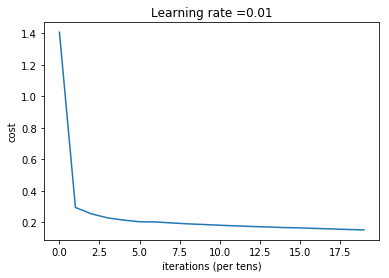

In [29]:
parameters = total_backward_forward(X_train, 
                                    y_train, 
                                    layer_dimensions, 
                                    learning_rate = 0.01,
                                    num_iterations = 2000, 
                                    print_cost = True)


In [30]:
#print(parameters)

# Predict (Hold out)

In [31]:
## TO DO ##

# Create your own predict function.
# Note the number of training examples
# Turn the probabilities into 0-1 predictions
# Replace False

def predict(X, y, parameters):
    """ 
    Input:
    X           -- data (test set)
    parameters  -- parameters of the trained model
    
    Output:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[0] # How many training examples?
    print('m: ' + str(m))
    n = len(parameters) // 2
    print('n: ' + str(n))
    p = np.zeros((1,m)) # Initialise probabilities to zero
    
    # Forward propagation
    probas, caches = total_forward(X, parameters)
    print('probas: ' + str(probas))
    
    # convert probas to 0/1 predictions. 
    p = np.where(probas >= 0.5,1,0)
            
    return p, probas

In [32]:
# Create some predictions
predictions, probas = predict(X_test, y_test, parameters)
# print(predictions[0])

m: 3072
n: 4
probas: [[0.27615632 0.07601046 0.00626281 ... 0.00165396 0.17539389 0.08161842]]


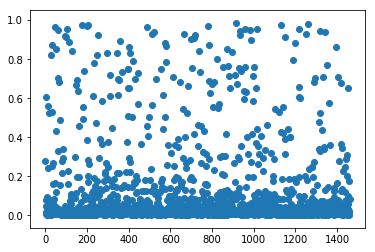

In [33]:
# Make a scatter plot of probabilities. Good check if something is wrong
plt.scatter(range(len(probas[0])), probas)

In [34]:
## Check your prediction value counts
pred_df = pd.DataFrame(predictions[0], columns=["prediction"])
pred_df.prediction.value_counts()

0    1327
1     134
Name: prediction, dtype: int64

In [35]:
# Do a bit of reshaping
predictions_sk = predictions.reshape(len(predictions[0]), 1)
print(predictions_sk.shape)

y_test_sk = y_test.T
print(y_test_sk.shape)

(1461L, 1L)
(1461L, 1L)


In [36]:
# Build some sklearn scores

#Get confusion matrix 
print("Confustion Matrix \n", confusion_matrix(list(y_test_sk), list(predictions_sk)))

#Get classification report
print(classification_report(y_test_sk, predictions_sk))

# Accuracy score
print("Accuracy: ", accuracy_score(y_test_sk, predictions_sk))

# ROC_AUC score
print("ROC_AUC: ", roc_auc_score(y_test_sk, probas.T))

('Confustion Matrix \n', array([[1258,   39],
       [  69,   95]], dtype=int64))
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1297
           1       0.71      0.58      0.64       164

   micro avg       0.93      0.93      0.93      1461
   macro avg       0.83      0.77      0.80      1461
weighted avg       0.92      0.93      0.92      1461

('Accuracy: ', 0.9260780287474333)
('ROC_AUC: ', 0.870728886548696)
